# EDA

## Dataset overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df_original = pd.read_csv("../data/CO2DriversEU_dataset.csv")

In [3]:
df_original.head()

,country,year,gdp,pop,transport.emissions,lgdp,lpop,ltransport.emissions,const,L1.ltransport.emissions,L1.lgdp,L1.lpop
0,Austria,1969,1.374701e+11,NaN,NaN,25.646672,NaN,NaN,1,NaN,NaN,NaN
1,Austria,1970,1.461597e+11,NaN,7679.77290,25.707966,NaN,8.946345,1,NaN,25.646672,NaN
2,Austria,1971,1.536358e+11,7500482.0,8464.73022,25.757851,15.830478,9.043663,1,8.946345,25.707966,NaN
3,Austria,1972,1.631733e+11,7544201.0,9479.28700,25.818078,15.836290,9.156864,1,9.043663,25.757851,15.830478
4,Austria,1973,1.711532e+11,7586115.0,10294.89017,25.865825,15.841830,9.239403,1,9.156864,25.818078,15.836290


In [4]:
# focus on original variables
df = df_original.iloc[:, 0:5]
df

,country,year,gdp,pop,transport.emissions
0,Austria,1969,1.374701e+11,NaN,NaN
1,Austria,1970,1.461597e+11,NaN,7679.772900
2,Austria,1971,1.536358e+11,7500482.0,8464.730220
3,Austria,1972,1.631733e+11,7544201.0,9479.287000
4,Austria,1973,1.711532e+11,7586115.0,10294.890170
...,...,...,...,...,...
1545,Sweden,2014,5.283662e+11,9696110.0,19420.316670
1546,Sweden,2015,5.520861e+11,9799186.0,19088.567788
1547,Sweden,2016,5.635175e+11,9923085.0,19388.689811
1548,Sweden,2017,5.779882e+11,10057698.0,19297.648303


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              1550 non-null   object 
 1   year                 1550 non-null   int64  
 2   gdp                  1297 non-null   float64
 3   pop                  1488 non-null   float64
 4   transport.emissions  1519 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 60.7+ KB


In [6]:
df.isna().sum()

country                  0
year                     0
gdp                    253
pop                     62
transport.emissions     31
dtype: int64

In [7]:
df.country.unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Switzerland', 'Cyprus',
       'Czech Republic', 'Germany', 'Denmark', 'Spain', 'Estonia',
       'Finland', 'France', 'United Kingdom', 'Greece', 'Croatia',
       'Hungary', 'Ireland', 'Iceland', 'Italy', 'Lithuania',
       'Luxembourg', 'Latvia', 'Malta', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Romania', 'Slovak Republic', 'Slovenia', 'Sweden'],
      dtype=object)

In [8]:
len(df.country.unique())

31

In [9]:
# exclude rows with NA
# compute observed period for each country
# 19 countries have 48 data point from 1971 to 2018
df.iloc[:,0:5].dropna().groupby("country")["year"].aggregate(["min", "max", "count"]).reset_index().sort_values("count", ascending = False)

,country,min,max,count
0,Austria,1971,2018,48
13,Iceland,1971,2018,48
29,Switzerland,1971,2018,48
28,Sweden,1971,2018,48
27,Spain,1971,2018,48
23,Portugal,1971,2018,48
21,Norway,1971,2018,48
20,Netherlands,1971,2018,48
19,Malta,1971,2018,48
18,Luxembourg,1971,2018,48


## Summary Statistics

### In 2018

In [10]:
df.query("year == 2018").iloc[:,2:5].describe()

,gdp,pop,transport.emissions
count,3.100000e+01,3.100000e+01,31.000000
mean,6.586102e+11,1.701345e+07,29197.245300
std,9.890327e+11,2.295376e+07,39677.565815
min,1.393721e+10,3.527210e+05,533.867926
25%,6.296537e+10,3.444693e+06,6241.098876
50%,2.527233e+11,8.514329e+06,13473.015519
75%,6.115829e+11,1.432934e+07,24558.276412
max,3.937238e+12,8.290578e+07,151203.545146


In [11]:
# In 2018, Top 3: Germany, France, United Kingdom
df.query("year == 2018")[["country", "transport.emissions"]].sort_values("transport.emissions", ascending = False)

,country,transport.emissions
349,Germany,151203.545146
599,France,117705.289532
649,United Kingdom,113804.184425
949,Italy,94818.518645
449,Spain,82738.406407
1299,Poland,57998.275319
1199,Netherlands,28761.763257
99,Belgium,25462.607213
49,Austria,23653.945610
299,Czech Republic,21137.354595


### all

In [12]:
df.iloc[:,2:5].describe()

,gdp,pop,transport.emissions
count,1.297000e+03,1.488000e+03,1519.000000
mean,5.094664e+11,1.593459e+07,23236.244860
std,7.526046e+11,2.101082e+07,35961.544985
min,1.133812e+09,2.060980e+05,143.086748
25%,4.965979e+10,3.428514e+06,3528.261530
50%,2.174647e+11,7.697355e+06,9133.493000
75%,4.831013e+11,1.432628e+07,19413.623168
max,3.937238e+12,8.290578e+07,172114.637094


## Visualization

### Summary Statistics

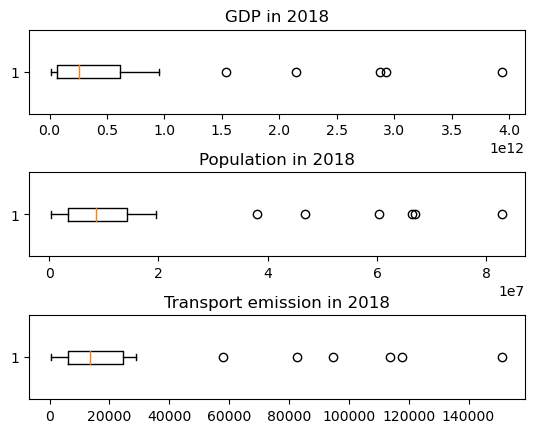

In [13]:
fig, ax = plt.subplots(3, 1)

ax[0].boxplot(df.query("year == 2018")["gdp"], vert = False)
ax[0].set_title('GDP in 2018')

ax[1].boxplot(df.query("year == 2018")["pop"], vert = False)
ax[1].set_title('Population in 2018')

ax[2].boxplot(df.query("year == 2018")["transport.emissions"], vert = False)
ax[2].set_title('Transport emission in 2018')

fig.subplots_adjust(hspace = 0.7)

### Time-series plot

In [14]:
df_plot = df.dropna()
year = df_plot.year.unique()
df_plot

,country,year,gdp,pop,transport.emissions
2,Austria,1971,1.536358e+11,7500482.0,8464.730220
3,Austria,1972,1.631733e+11,7544201.0,9479.287000
4,Austria,1973,1.711532e+11,7586115.0,10294.890170
5,Austria,1974,1.779002e+11,7599038.0,9561.201800
6,Austria,1975,1.772532e+11,7578903.0,9808.196800
...,...,...,...,...,...
1545,Sweden,2014,5.283662e+11,9696110.0,19420.316670
1546,Sweden,2015,5.520861e+11,9799186.0,19088.567788
1547,Sweden,2016,5.635175e+11,9923085.0,19388.689811
1548,Sweden,2017,5.779882e+11,10057698.0,19297.648303


Text(0.5, 1.0, 'Time-series: Transport emissions for all countries in EU')

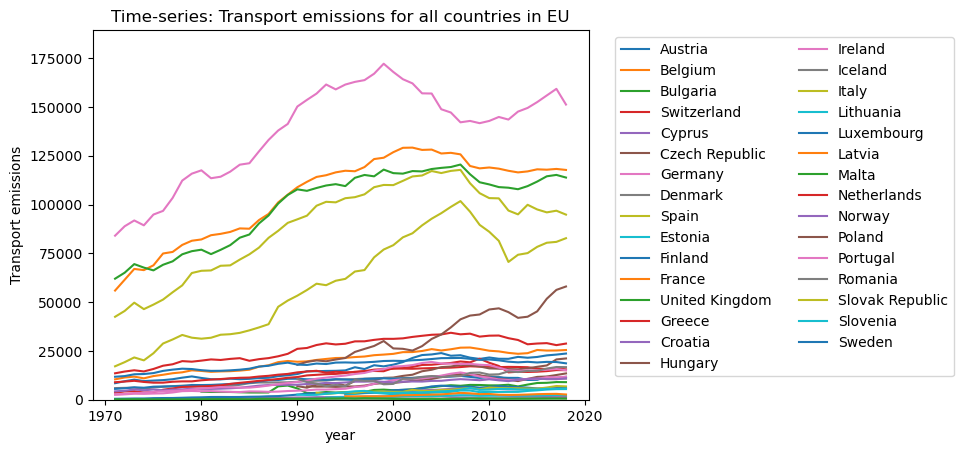

In [15]:
all_country = df_plot["country"].unique().tolist()

for country in all_country:
    plt.plot(df_plot.loc[df_plot["country"] == country, "year"], df_plot.loc[df_plot["country"] == country, "transport.emissions"], label = country)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", ncol = 2)
plt.ylim((0,df_plot["transport.emissions"].max()*1.1))
plt.xlabel("year")
plt.ylabel("Transport emissions")
plt.title("Time-series: Transport emissions for all countries in EU")

Text(0.5, 1.0, 'Time-series: Transport emissions for Top 6 countries in EU')

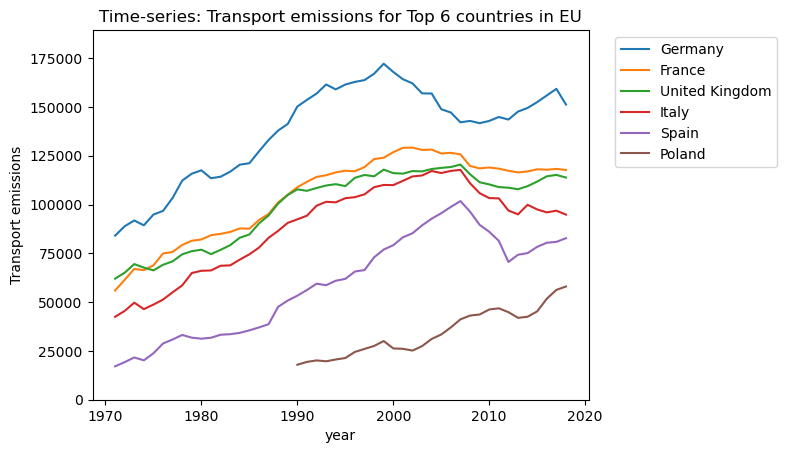

In [16]:
top_country = ["Germany", "France", "United Kingdom", "Italy", "Spain", "Poland"]

for country in top_country:
    plt.plot(df_plot.loc[df_plot["country"] == country, "year"], df_plot.loc[df_plot["country"] == country, "transport.emissions"], label = country)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.ylim((0,df_plot["transport.emissions"].max()*1.1))
plt.xlabel("year")
plt.ylabel("Transport emissions")
plt.title("Time-series: Transport emissions for Top 6 countries in EU")

Text(0.5, 1.0, 'Time-series: Transport emissions for all countries but top 6 in EU')

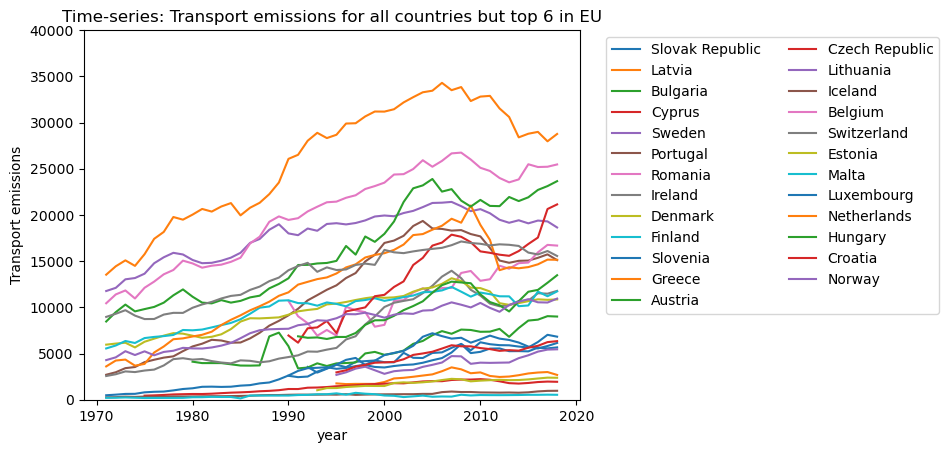

In [17]:
all_country = df_plot["country"].unique().tolist()
all_but_top5_country = list(set(all_country) - set(top_country))

for country in all_but_top5_country:
    plt.plot(df_plot.loc[df_plot["country"] == country, "year"], df_plot.loc[df_plot["country"] == country, "transport.emissions"], label = country)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", ncol = 2)
plt.ylim((0,40000))
plt.xlabel("year")
plt.ylabel("Transport emissions")
plt.title("Time-series: Transport emissions for all countries but top 6 in EU")

### Relationships

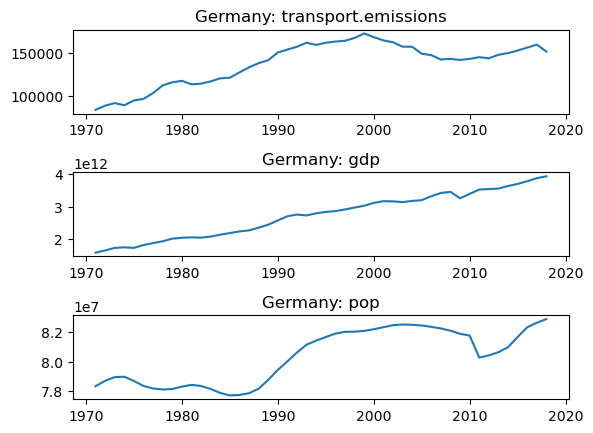

In [18]:
col_plot = ["transport.emissions", "gdp", "pop"]

fig, ax = plt.subplots(len(col_plot), 1)


for i in range(len(col_plot)):
    ax[i].plot(year, df_plot.loc[df_plot["country"] == "Germany",col_plot[i]])
    ax[i].set_title( "Germany: " + col_plot[i])


fig.subplots_adjust(hspace = 0.7)

## Linear regression

### simple ols

In [19]:
df_Germany = df.loc[df["country"] == "Germany", :].dropna()

y = df_Germany['transport.emissions']
x = df_Germany[["gdp", "pop"]]
x = sm.add_constant(x)

result_ols = sm.OLS(y, x).fit()
result_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     transport.emissions   R-squared:                       0.686
Model:                             OLS   Adj. R-squared:                  0.672
Method:                  Least Squares   F-statistic:                     49.15
Date:                 Wed, 22 Mar 2023   Prob (F-statistic):           4.80e-12
Time:                         22:53:22   Log-Likelihood:                -525.32
No. Observations:                   48   AIC:                             1057.
Df Residuals:                       45   BIC:                             1062.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.245e+05   1.58e+05     -2.052      0.046   -6.43e+05   -6061.965
gdp         1.708e-08   5.68e-09      3.007      0.004    5.64e-09    2.85e-08
pop            0.0052      0.002      2.427      0.019       0.001       0.009
==============================================================================
Omnibus:                       14.428   Durbin-Watson:                   0.085
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                3.236
Skew:                          -0.056   Prob(JB):                        0.198
Kurtosis:                       1.733   Cond. No.                     2.19e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+14. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### log-log model

In [20]:
df_Germany['ln_transport.emissions'] = np.log(df_Germany['transport.emissions'])
df_Germany['ln_gdp'] = np.log(df_Germany['gdp'])
df_Germany['ln_pop'] = np.log(df_Germany['pop'])

y = df_Germany['ln_transport.emissions']
x = df_Germany[["ln_gdp", "ln_pop"]]
x = sm.add_constant(x)

result_ols_ln = sm.OLS(y, x).fit()
result_ols_ln.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     ln_transport.emissions   R-squared:                       0.747
Model:                                OLS   Adj. R-squared:                  0.736
Method:                     Least Squares   F-statistic:                     66.54
Date:                    Wed, 22 Mar 2023   Prob (F-statistic):           3.62e-14
Time:                            22:53:22   Log-Likelihood:                 43.371
No. Observations:                      48   AIC:                            -80.74
Df Residuals:                          45   BIC:                            -75.13
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -20.4194     19.766     -1.033      0.307     -60.231      19.392
ln_gdp         0.5791      0.106      5.464      0.000       0.366       0.793
ln_pop         0.8607      1.224      0.703      0.486      -1.605       3.326
==============================================================================
Omnibus:                       32.513   Durbin-Watson:                   0.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                4.272
Skew:                           0.002   Prob(JB):                        0.118
Kurtosis:                       1.539   Cond. No.                     4.60e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### squared

In [21]:
df_Germany['sq_gdp'] = df_Germany['gdp']**2
df_Germany['sq_pop'] = df_Germany['pop']**2

y = df_Germany['transport.emissions']
x = df_Germany[["gdp", "pop", "sq_gdp", "sq_pop"]]
x = sm.add_constant(x)

result_ols_sq = sm.OLS(y, x).fit()
result_ols_sq.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     transport.emissions   R-squared:                       0.845
Model:                             OLS   Adj. R-squared:                  0.838
Method:                  Least Squares   F-statistic:                     122.6
Date:                 Wed, 22 Mar 2023   Prob (F-statistic):           6.10e-19
Time:                         22:53:22   Log-Likelihood:                -508.38
No. Observations:                   48   AIC:                             1023.
Df Residuals:                       45   BIC:                             1028.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.211e-21   1.11e-21      8.289      0.000    6.97e-21    1.14e-20
gdp         1.718e-07   2.07e-08      8.289      0.000     1.3e-07    2.14e-07
pop         3.733e-13    4.5e-14      8.289      0.000    2.83e-13    4.64e-13
sq_gdp      -2.51e-20    3.5e-21     -7.171      0.000   -3.21e-20    -1.8e-20
sq_pop     -2.056e-11   4.54e-12     -4.533      0.000   -2.97e-11   -1.14e-11
==============================================================================
Omnibus:                        3.472   Durbin-Watson:                   0.159
Prob(Omnibus):                  0.176   Jarque-Bera (JB):                2.137
Skew:                           0.294   Prob(JB):                        0.343
Kurtosis:                       2.150   Cond. No.                     3.08e+28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.08e+28. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### lag

In [22]:
df_Germany['lag_gdp'] = df_Germany['gdp'].shift() 
df_Germany['lag_pop'] = df_Germany['pop'].shift() 

y = df_Germany['transport.emissions'].iloc[1:,]
x = df_Germany[["gdp", "pop", "lag_gdp", "lag_pop"]].dropna()
x = sm.add_constant(x)

result_ols_lag = sm.OLS(y, x).fit()
result_ols_lag.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     transport.emissions   R-squared:                       0.706
Model:                             OLS   Adj. R-squared:                  0.678
Method:                  Least Squares   F-statistic:                     25.20
Date:                 Wed, 22 Mar 2023   Prob (F-statistic):           1.09e-10
Time:                         22:53:22   Log-Likelihood:                -510.79
No. Observations:                   47   AIC:                             1032.
Df Residuals:                       42   BIC:                             1041.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.239e+05   1.55e+05     -2.084      0.043   -6.37e+05   -1.03e+04
gdp         3.327e-08   3.63e-08      0.917      0.365      -4e-08    1.06e-07
pop            0.0166      0.006      2.930      0.005       0.005       0.028
lag_gdp    -1.825e-08   3.71e-08     -0.492      0.625   -9.31e-08    5.66e-08
lag_pop       -0.0114      0.006     -2.053      0.046      -0.023      -0.000
==============================================================================
Omnibus:                        4.208   Durbin-Watson:                   0.235
Prob(Omnibus):                  0.122   Jarque-Bera (JB):                2.754
Skew:                          -0.409   Prob(JB):                        0.252
Kurtosis:                       2.142   Cond. No.                     3.16e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.16e+14. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Fit

Text(0.5, 1.0, 'Model fitting')

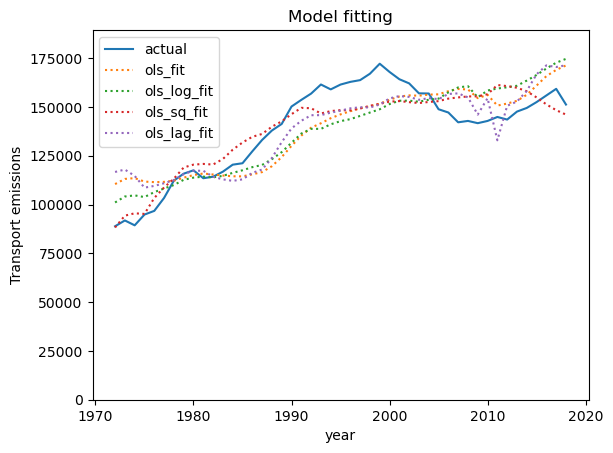

In [23]:
# drop 1st obs. due to lag model.
results = {
    "ols_fit": result_ols.fittedvalues.iloc[1:,],
    "ols_log_fit": np.exp(result_ols_ln.fittedvalues).iloc[1:,],
    "ols_sq_fit": result_ols_sq.fittedvalues.iloc[1:,],
    "ols_lag_fit": result_ols_lag.fittedvalues
}

plt.plot(df_Germany.year.iloc[1:,], df_Germany["transport.emissions"].iloc[1:,], label = "actual")

for i in ['ols_fit', 'ols_log_fit', 'ols_sq_fit', 'ols_lag_fit']:
    plt.plot(df_Germany.year.iloc[1:,], results[i], label = i, ls = "dotted")

plt.legend()
plt.ylim((0,df_Germany["transport.emissions"].max()*1.1))
plt.xlabel("year")
plt.ylabel("Transport emissions")
plt.title("Model fitting")